# PyTorch Fundamentals

- This is the start of my learning module for PyTorch

- This notebook deals with the concepts of tensors, mostly

In [9]:
import torch as pt

In [155]:
pt.__version__

'2.3.0'

# Tensors

- Fundamental building block of ML
- Represents data in a numerical format

## Scalar

- Single number
- Zero dimension

In [10]:
scalar = pt.tensor(7)
scalar

tensor(7)

In [11]:
scalar.ndim

0

In [12]:
type(scalar)

torch.Tensor

In [13]:
scalar.item()

7

In [36]:
scalar.shape # 0 dim

torch.Size([])

## Vector
- Single dimension
- Contains many numbers


In [16]:
vector = pt.tensor([1,2,3])
vector

tensor([1, 2, 3])

In [17]:
vector.ndim

1

In [22]:
vector[:2]

tensor([1, 2])

In [34]:
vector.shape # 3x1 matrix

torch.Size([3])

## Matrix

In [30]:
matrix = pt.tensor(
    [
        [7,8],
        [12,13]
    ]
)

matrix

tensor([[ 7,  8],
        [12, 13]])

In [31]:
matrix.ndim

2

In [33]:
matrix.shape # 2x2 matrix

torch.Size([2, 2])

## Tensors
- Any dimension
- Generalization of vectors and matrices


In [41]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [46]:
TENSOR.shape # 3D tensor

# Dim goes outer to inner
# Read it as: 1 dimension of 3x3 matrix

torch.Size([1, 3, 3])

In [43]:
TENSOR.ndim

3

## Summary Till Now
<div>
    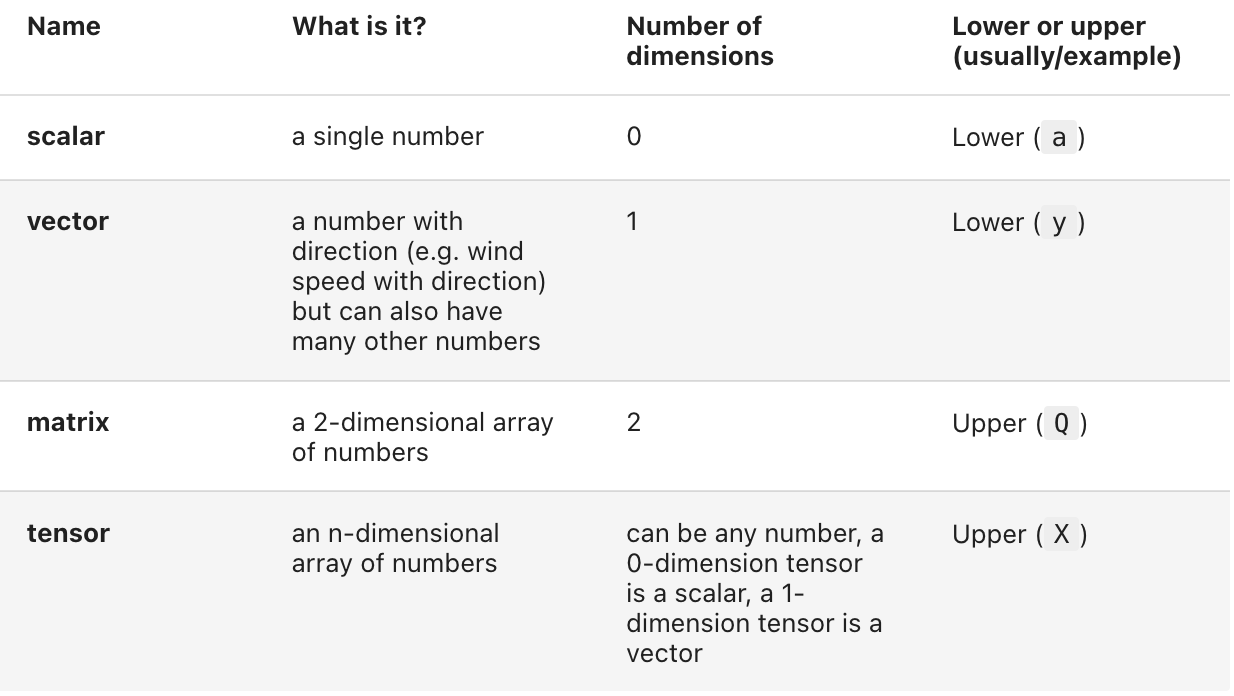
    <br><br>
    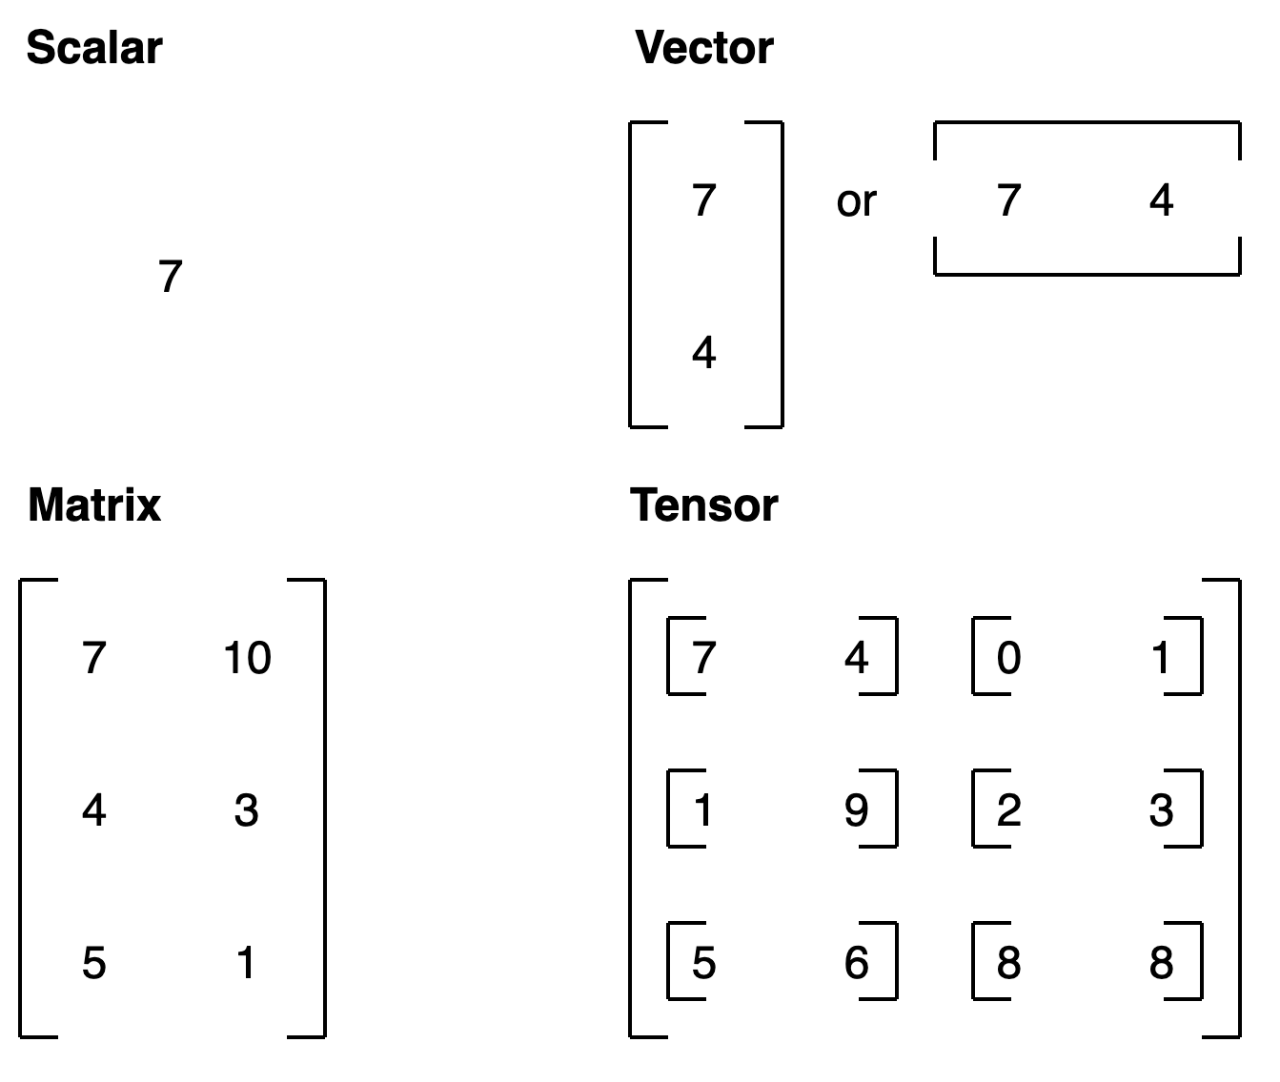
</div>

## Random Tensor

In [57]:
random_tensor = pt.rand(size=(224,224,3))
random_tensor.shape

torch.Size([224, 224, 3])

In [59]:
random_tensor.dtype

torch.float32

In [75]:
random_int_tensor = pt.randint(0, 10, (3,3), dtype=pt.int16)

In [76]:
random_int_tensor

tensor([[1, 0, 7],
        [4, 0, 7],
        [4, 9, 4]], dtype=torch.int16)

In [77]:
random_int_tensor.dtype

torch.int16

In [66]:
pt.arange(0, 10, 2)
# start, stop, step

tensor([0, 2, 4, 6, 8])

## Tensor of Zeros or Ones

In [129]:
pt.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [132]:
pt.ones((2,5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## Note to self
- While creating tensors, an important attribute to keep in mind is the dtype
- Prefer using 32 bit or even 16 bit values, if possible


In [86]:
random_int_tensor = pt.randint(0, 10, (3,3), dtype=pt.int16)
print(random_int_tensor.device)
random_int_tensor = pt.randint(0, 10, (3,3), dtype=pt.int16, device='mps')
print(random_int_tensor.device)

cpu
mps:0


# Arithmatic Operations on Tensors

- Addition
- Subtraction
- Multiplication (Element-Wise)
- Division
- Matrix Multiplication

## Basic Operations

In [87]:
random_int_tensor

tensor([[3, 8, 5],
        [2, 5, 4],
        [5, 9, 5]], device='mps:0', dtype=torch.int16)

In [88]:
random_int_tensor + 10

tensor([[13, 18, 15],
        [12, 15, 14],
        [15, 19, 15]], device='mps:0', dtype=torch.int16)

In [89]:
random_int_tensor - 3

tensor([[ 0,  5,  2],
        [-1,  2,  1],
        [ 2,  6,  2]], device='mps:0', dtype=torch.int16)

In [90]:
random_int_tensor * 10

tensor([[30, 80, 50],
        [20, 50, 40],
        [50, 90, 50]], device='mps:0', dtype=torch.int16)

In [93]:
random_int_tensor/10

tensor([[0.3000, 0.8000, 0.5000],
        [0.2000, 0.5000, 0.4000],
        [0.5000, 0.9000, 0.5000]], device='mps:0')

In [96]:
# Tensors operations aren't inplace by default
random_int_tensor

tensor([[3, 8, 5],
        [2, 5, 4],
        [5, 9, 5]], device='mps:0', dtype=torch.int16)

In [99]:
# Also inbuilt operations
pt.multiply(random_int_tensor, 10)

tensor([[30, 80, 50],
        [20, 50, 40],
        [50, 90, 50]], device='mps:0', dtype=torch.int16)

In [100]:
random_int_tensor

tensor([[3, 8, 5],
        [2, 5, 4],
        [5, 9, 5]], device='mps:0', dtype=torch.int16)

## Matrix Multiplication


In [111]:
mat_A = pt.tensor([[10,10,10]])
mat_B = pt.tensor([
    [5],
    [6],
    [9]
])

In [112]:
print(mat_A.shape)
print(mat_B.shape)

torch.Size([1, 3])
torch.Size([3, 1])


In [113]:
pt.matmul(mat_A, mat_B)

tensor([[200]])

In [114]:
50+60+90

200

In [115]:
pt.matmul(mat_B, mat_A)

tensor([[50, 50, 50],
        [60, 60, 60],
        [90, 90, 90]])

In [118]:
# Shorthand notation for mat_mul (similar to numpy)
mat_B @ mat_A

tensor([[50, 50, 50],
        [60, 60, 60],
        [90, 90, 90]])

In [121]:
# Transpose
mat_B.T

tensor([[5, 6, 9]])

In [126]:
mat_A

tensor([[10, 10, 10]])

In [127]:
# element wise multiply
mat_A * mat_A

tensor([[100, 100, 100]])

## Most Common Error: RuntimeError - Matmul()

In [145]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

# pt.matmul(tensor_A, tensor_B) # (this will throw an error due to dimension miss-match)

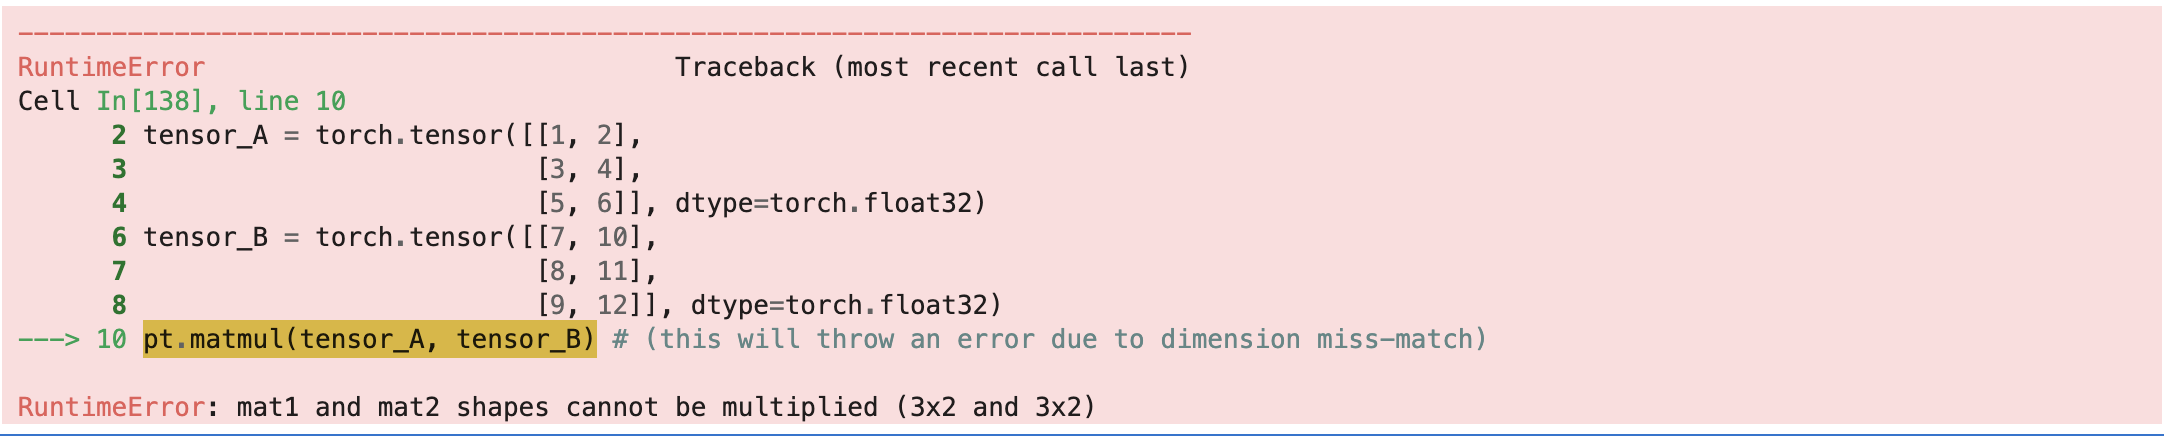

In [139]:
pt.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

## Changing D-Type of Tensors

In [142]:
random_int_tensor

tensor([[3, 8, 5],
        [2, 5, 4],
        [5, 9, 5]], device='mps:0', dtype=torch.int16)

In [143]:
random_int32_tensor = random_int_tensor.type(pt.int32)

In [144]:
random_int32_tensor

tensor([[3, 8, 5],
        [2, 5, 4],
        [5, 9, 5]], device='mps:0', dtype=torch.int32)

## Note to self

- All numpy operations are applicable on the tensors:
    - .min()
    - .max()
    - .mean()
    - .argmin(), .argmax()


# More Operations

## Reshaping

In [157]:
x = pt.arange(1,8)
x

tensor([1, 2, 3, 4, 5, 6, 7])

In [158]:
x.shape

torch.Size([7])

In [163]:
x_reshaped = x.reshape(1,7)
x_reshaped

tensor([[1, 2, 3, 4, 5, 6, 7]])

In [164]:
x_reshaped.shape

torch.Size([1, 7])

In [167]:
x_reshaped[0][0] = 100

In [168]:
x_reshaped

tensor([[100,   2,   3,   4,   5,   6,   7]])

In [169]:
x

tensor([100,   2,   3,   4,   5,   6,   7])

- Original tensor's value was changed too

## Stacking

In [171]:
x = pt.tensor([4,2,78,2])
x

tensor([ 4,  2, 78,  2])

In [178]:
# stack by the rows
x_stached = pt.stack([x,x,x], dim=0)
x_stached

tensor([[ 4,  2, 78,  2],
        [ 4,  2, 78,  2],
        [ 4,  2, 78,  2]])

In [179]:
x_stached.shape

torch.Size([3, 4])

In [180]:
# stack by the columns
x_stached = pt.stack([x,x,x], dim=1)
x_stached

tensor([[ 4,  4,  4],
        [ 2,  2,  2],
        [78, 78, 78],
        [ 2,  2,  2]])

In [181]:
x_stached.shape

torch.Size([4, 3])

## Squeezing

In [184]:
x = pt.tensor([[5,4,3,2,1,2,3,4,5]])
x

tensor([[5, 4, 3, 2, 1, 2, 3, 4, 5]])

In [185]:
x.shape

torch.Size([1, 9])

In [187]:
pt.squeeze(x).shape

torch.Size([9])

In [189]:
# removes unwanted single dimensions
# all dims are now more than one
x.squeeze()

tensor([5, 4, 3, 2, 1, 2, 3, 4, 5])

# NumPy and PyTorch

In [190]:
import numpy as np

In [195]:
np_arr = np.arange(1,10)
np_arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [203]:
pt_arr = pt.from_numpy(np_arr).type(pt.float16)

In [204]:
pt_arr.numpy()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float16)

# Set Seed
- use the manual seed method before each operation that you want to seed

In [262]:
pt.manual_seed(10.02)
arr1 = pt.rand((2,2))
pt.manual_seed(10.02)
arr2 = pt.rand((2,2))

In [263]:
arr1

tensor([[0.4581, 0.4829],
        [0.3125, 0.6150]])

In [264]:
arr2

tensor([[0.4581, 0.4829],
        [0.3125, 0.6150]])

# Changing device

In [266]:
arr1.device

device(type='cpu')

In [270]:
arr1 = arr1.to('mps')

In [275]:
# Below code will throw an error
# arr1.numpy()

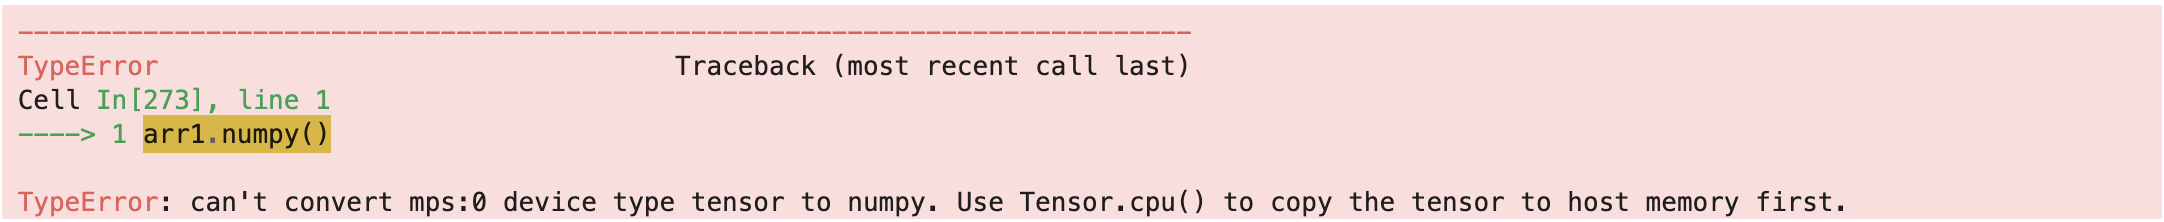

In [276]:
arr1.cpu().numpy()

array([[0.45808464, 0.48285657],
       [0.31249833, 0.61502165]], dtype=float32)